In [3]:
# Classical ML with Scikit-learn - Iris Classification

## 1. Import Libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### Load the Data

In [4]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = [iris.target_names[i] for i in y]

print("Dataset shape:", X.shape)
print("Target names:", iris.target_names)
df.head()

Dataset shape: (150, 4)
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Visualization

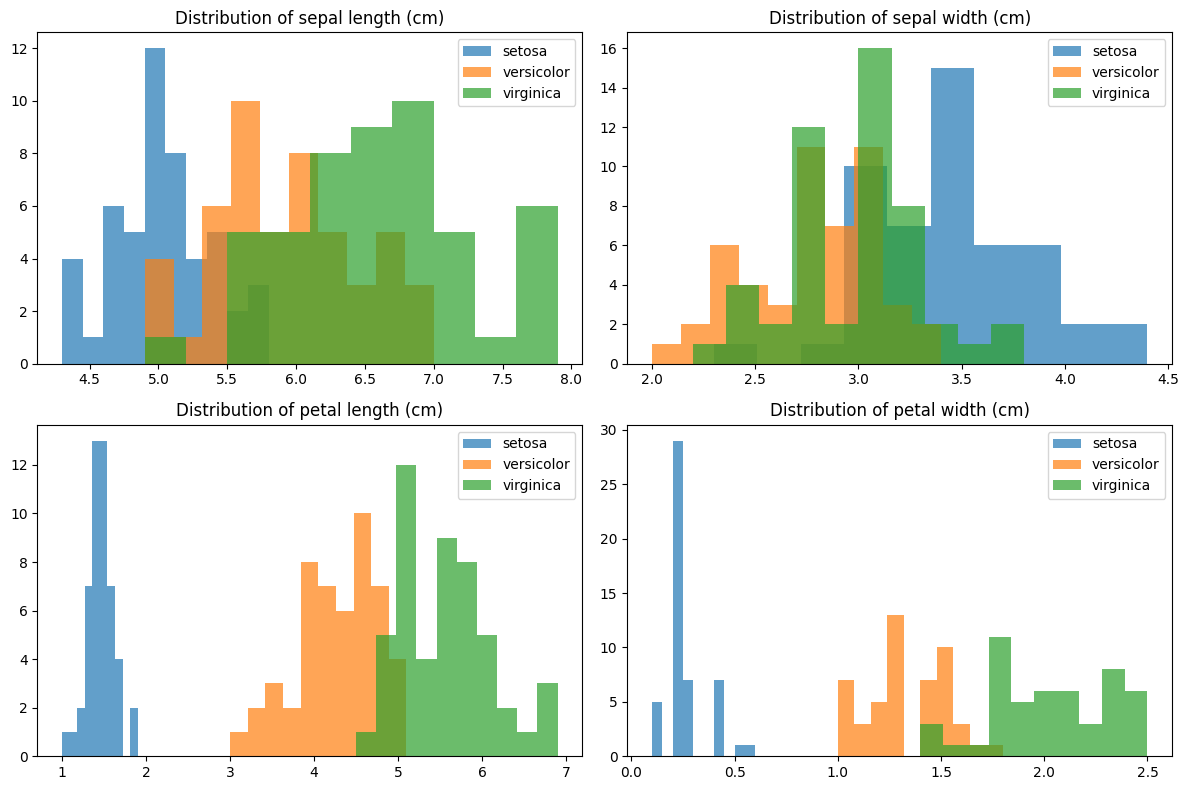

In [5]:
# Plot feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in range(3):
        plt.hist(X[y == species, i], alpha=0.7, label=iris.target_names[species])
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

### Preprocessing and Model Training

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print("✓ Model trained successfully")

✓ Model trained successfully


### Model Evaluation

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



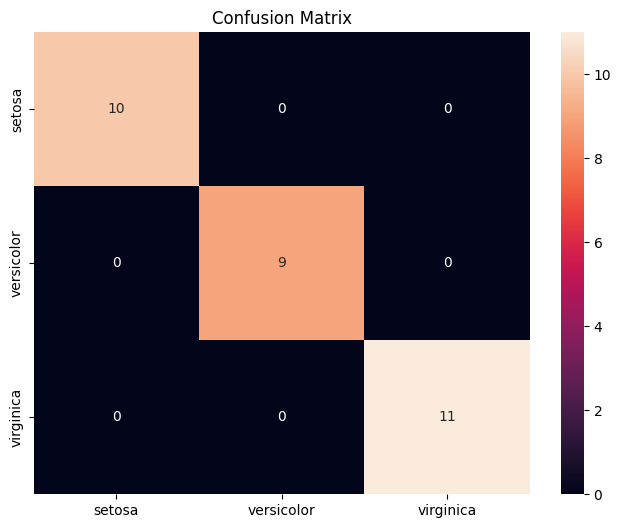

In [7]:
# Predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.show()

### Visualize Decision Tree

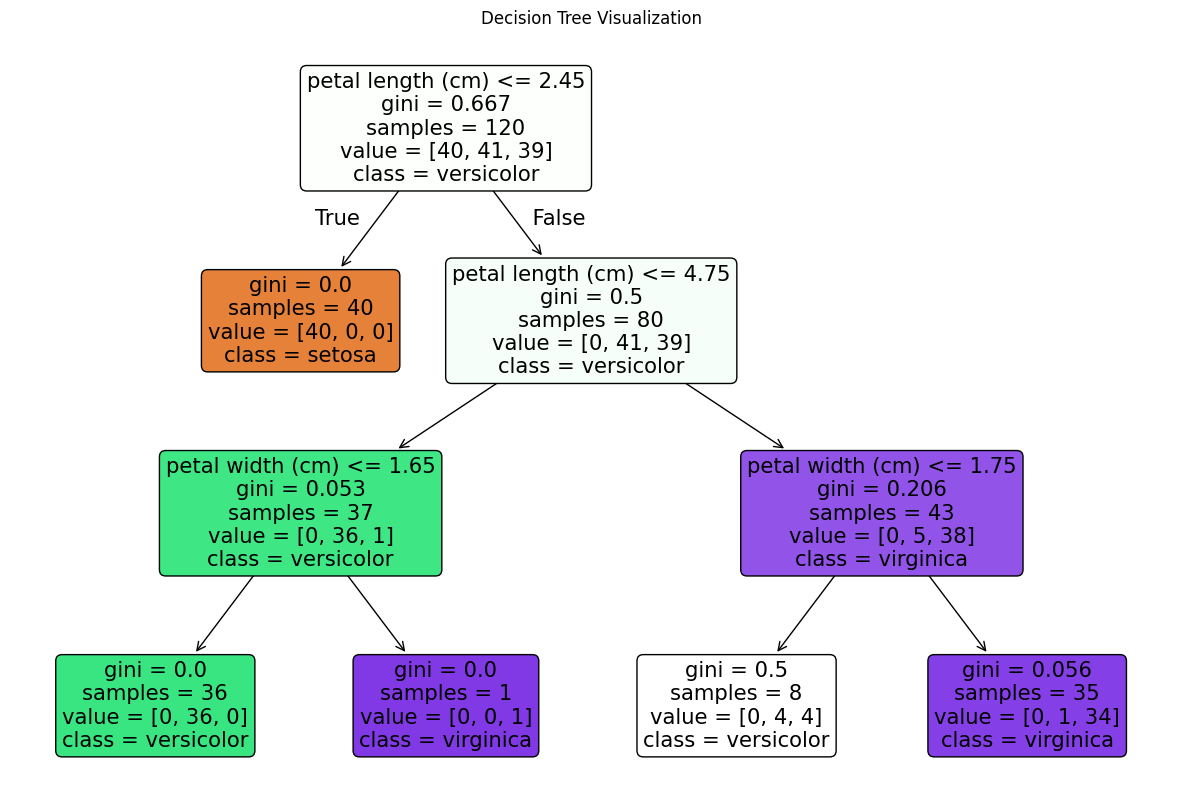

In [8]:
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()